# Prepare matplotlib

In [1]:
import json
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from matplotlib.ticker import MultipleLocator, NullFormatter

rc_fonts = {
    "text.usetex": True,
    "text.latex.preamble": "\n".join([r"\usepackage{libertine}", r"\usepackage[libertine]{newtxmath}"]),
}
mpl.rcParams.update(rc_fonts)

# Load data

In [2]:
# Functions for loading BLiMP data


def load_blimp_data(path: Path) -> dict:
    with path.open() as f:
        data = json.load(f)
    if "blimp" in data:
        data = data["blimp"]
    return data


def get_uids(data: dict):
    return np.array(list(data["by_uid"].values()))

In [3]:
# Load all BLiMP data
data = []
steps = list(range(0, 20_001, 1_000))
for i in steps:
    baseline_data = load_blimp_data(Path(f"blimp_results_small/step_{i}.json"))
    base_uids = get_uids(baseline_data)

    relora_data = load_blimp_data(Path(f"relora-tiny-eval/step_{i}.json"))
    relora_uids = get_uids(relora_data)

    step_data = np.column_stack([base_uids, relora_uids])
    data.append(step_data)

data = np.column_stack(data)

/var/folders/2y/6ry1xqnj2r9_fpqf_pp017mw0000gn/T/ipykernel_18374/877335462.py:62: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


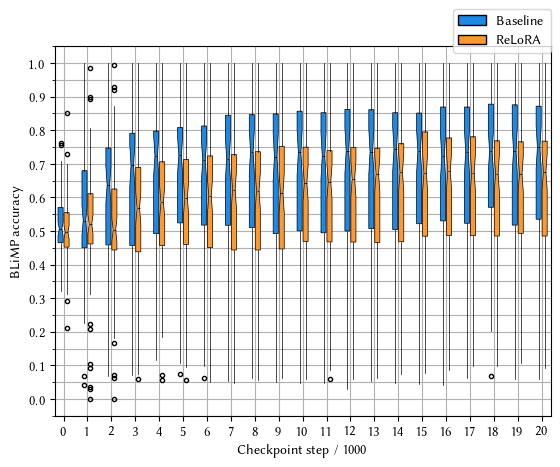

In [15]:
fig, ax = plt.subplots()

labels = ["Baseline", "ReLoRA"]

positions = []

steps = np.arange(0, 21, 1) * 2

group_width = 0.9  # Total width for each group of boxes
box_width = 0.4
box_offset = 0.05
real_offset = (box_width / 2) + box_offset
positions = []

for i in steps:
    positions.extend([i - real_offset, i + real_offset])

LINE_WEIGHT = 0.5

boxplot = ax.boxplot(
    data,
    patch_artist=True,
    sym=".",
    notch=True,
    showcaps=False,
    positions=positions,
    widths=(group_width - box_offset) / 2,
    medianprops={"color": "black", "linewidth": LINE_WEIGHT},
    boxprops={"linewidth": LINE_WEIGHT},
    whiskerprops={"linewidth": LINE_WEIGHT},
    flierprops={"linewidth": LINE_WEIGHT},
)

# Set colors for boxes
colors = ["#1E88E5", "#FF992F"]
for idx, patch in enumerate(boxplot["boxes"]):
    patch.set_facecolor(colors[idx % 2])

ax.set_ylabel("BLiMP accuracy")


ax.set_xticks(steps, labels=[str(i) for i in range(0, 21)])

ax.set_xlabel(r"Checkpoint step / 1000")

ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
# ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}'))
ax.yaxis.set_minor_formatter(NullFormatter())


ax.grid(which="both", axis="both")

legend_elements = [
    Patch(facecolor=color, edgecolor="black", label=label) for color, label in zip(colors, labels)
]

# Add the legend
ax.legend(handles=legend_elements, loc="upper right", bbox_to_anchor=(1, 1.1), borderaxespad=0)


fig.savefig("../graphs/tiny_blimp_box.pdf")
fig.show()